📁 Upload your advanced stats CSV file (must include: PER, WS, VORP)


Saving nba_advanced_stats_2024_2025.csv to nba_advanced_stats_2024_2025.csv
✅ Columns available: ['Player', 'PER', 'TS%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
✅ Filtered players: 59
🏀 Top 10 Players – Core Impact Score (2024–25)


,Player,PER,WS,VORP,impact_score_core
0,Nikola Jokic,32.0,16.4,9.8,0.992593
1,Shai Gilgeous-Alexander,30.7,16.7,8.9,0.934342
2,Giannis Antetokounmpo,30.5,11.5,6.6,0.713028
3,Tyrese Haliburton,21.8,10.4,4.9,0.412101
4,Domantas Sabonis,22.9,10.1,4.4,0.411915
5,Jarrett Allen,22.1,11.6,3.6,0.399116
6,Ivica Zubac,22.3,11.7,3.4,0.398719
7,Karl-Anthony Towns,23.4,10.1,3.5,0.389423
8,Jayson Tatum,21.7,9.5,4.8,0.383649
9,Anthony Davis,26.3,6.7,3.2,0.363522


/tmp/ipython-input-1-1885859748.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_name, y='Player', data=df_top10, palette='viridis')


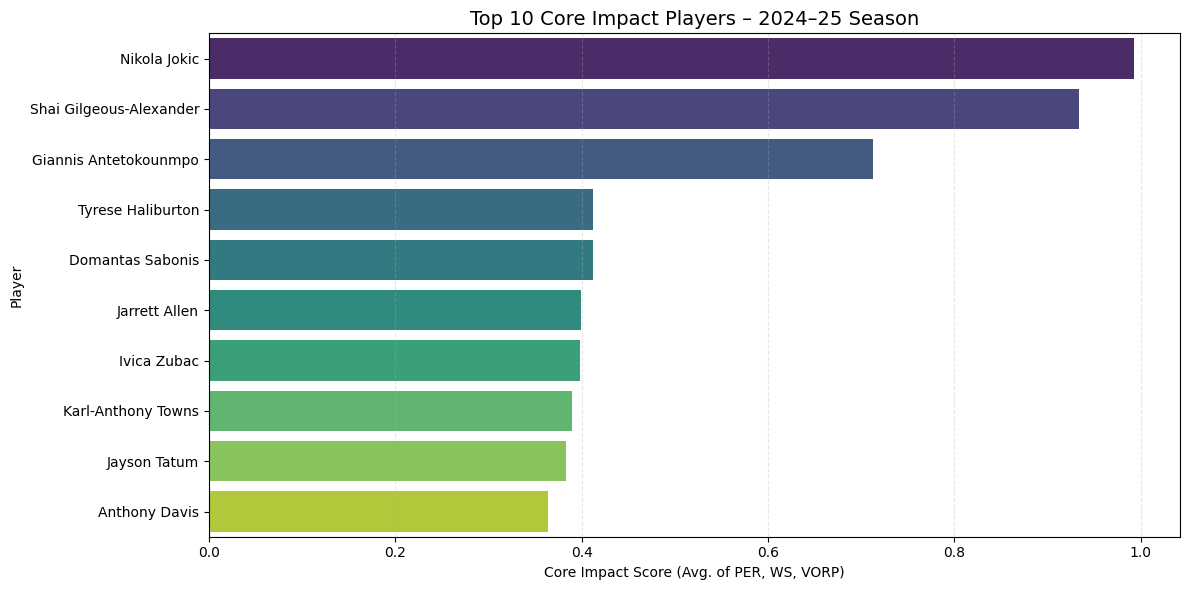

📁 Results saved to: top10_impact_score_core_2024_2025.csv


In [1]:
# 📓 Statline Quick Contribution Notebook
# 🎯 Core Impact Score – 2024–25 Season

# 🟦 Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

# 🟦 Step 2: Upload your CSV file
print("📁 Upload your advanced stats CSV file (must include: PER, WS, VORP)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 🟦 Step 3: Load and inspect dataset
df = pd.read_csv(filename)
print("✅ Columns available:", df.columns.tolist())

# 🟦 Step 4: Convert selected columns to numeric
metrics = ['PER', 'WS', 'VORP']
df[metrics] = df[metrics].apply(pd.to_numeric, errors='coerce')

# 🟦 Step 5: Drop exact duplicate players by name
df = df.drop_duplicates(subset='Player')

# 🟦 Step 6: Filter players based on thresholds
df_filtered = df[
    (df['PER'] > 18) &
    (df['WS'] > 3.0) &
    (df['VORP'] > 1.0)
].copy()

print(f"✅ Filtered players: {len(df_filtered)}")

# 🟦 Step 7: Normalize selected metrics
scaler = MinMaxScaler()
df_filtered[[col + '_norm' for col in metrics]] = scaler.fit_transform(df_filtered[metrics])

# 🟦 Step 8: Compute Core Impact Score
score_name = 'impact_score_core'
df_filtered[score_name] = df_filtered[[col + '_norm' for col in metrics]].mean(axis=1)

# 🟦 Step 9: Get Top 10 players by Core Impact Score
df_top10 = df_filtered.sort_values(by=score_name, ascending=False).head(10).reset_index(drop=True)

# 🟦 Step 10: Detect team column if available
team_col = next((col for col in ['Team', 'Tm', 'TEAM', 'team'] if col in df.columns), None)

# 🟦 Step 11: Display Top 10 table
print("🏀 Top 10 Players – Core Impact Score (2024–25)")
display_cols = ['Player']
if team_col: display_cols.append(team_col)
display_cols += metrics + [score_name]
display(df_top10[display_cols])

# 🟦 Step 12: Plot Core Impact Score
plt.figure(figsize=(12, 6))
sns.barplot(x=score_name, y='Player', data=df_top10, palette='viridis')
plt.title("Top 10 Core Impact Players – 2024–25 Season", fontsize=14)
plt.xlabel("Core Impact Score (Avg. of PER, WS, VORP)")
plt.ylabel("Player")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 🟦 Step 13: Save to CSV
output_file = "top10_impact_score_core_2024_2025.csv"
df_top10[display_cols].to_csv(output_file, index=False)
print(f"📁 Results saved to: {output_file}")